# WORD EMBEDDING
a computer or a model is not implicitly able to understand text. so it need to have some interior representation of texts. It's doing this with a concept which is called word embeddings.

so it's creating long vectors of numbers which are then internally representing texts sentences or just single words.

to get this understanding we will cover different concepts:
- one very simple called one-hot encoding.
- others with neural networks.

we will dive deeper and get some understanding of some actual model. This is one of the first models which was showing the value of NLP which is called GLOVE: global vectors for word representation.
- we will create some code which is taking different words from different categories and putting them into a two dimensional space.
- and this will show that the model is actually able to get the understanding of these concepts.

# NLP 101
- filed of AI with focus on computers to understand, interpret, and generate human language.
- involves algorithms, usually deep learning to analyze and manipulate text to speech.
- can extract meaningful insights from large amounts of unstructured text data, like social media posts, customer reviews.
- wide range of applications:
    - chatbots
    - sentiment analysis
    - translation
    - speech recognition

- how does it works?
the flow is the following. We have certaon text input, so we have for example the string "i like this book so much I cannot"
and then this one is passed into a neural network model, and there might be different kinds of predictions. So it could be that the next words should be predicted. So then it could sound like: "i like this book so much I cannot put it down".

It could be provided some sentiment analysis which is returning the polarity or the sentiment of the sentence. Il could also be that you provide this to some text summarization algorithm, and then il could provide some return, like this is a positive book review, or you could provide some translation.


But there are some technical steps that we have to take into account. The problem is that we are working with deep learning and deep learning can only work with numerical inputs, but we have strings. So the main topic is actually how can we convert the words that we are using into some kind of numerical representation.

So we want to put in this sentence, parse it into a network and get some prediction. But networks can only consume numbers and not text. So there is one additional step that needs to be taken, and this is the CONVERSION OF THE TEXT INTO THIS NUMERICAL FORMAT and this is called word embedding.

There are different techniques, but usually the good ones are all based on neural networks. So in the end, deep learning is involved in two stages of this process. It's involved usually in the first step of the word embedding, and then later on, this word embedding is used in the neural network.

# VOCABULARY
- TOKENIZATION -> take the sentence and get a list of tokens. All the different words are taken and separated. There are different tokenizers.
- DOCUMENT -> suppose to have a review, if we have a complete sentence corresponding to this review, this could be called a document. And if you have a lot of different reviews you would have a lot of different documents. If you take all these documents together you would have a text corpus, or just corpus.

# WORD EMBEDDING
we are converting in this step our words or even the complete sentences into numbers, and we are representing with this the different words as unique tensors in some higher dimensional space. Ideally, these word embeddings are able to grasp the relationship from one word to another word. So we start with a sentence, and we want to break it down. In the first step, different words are separated by tokenization. And then this one is corresponding to a tensor. So each word will be represented by a tensor, but how we do that?
- we can use one-hot encoding or some frequency based approach or we can use some NN approach.
- let's start with one-hot encoding. In OHE you have a sentence like:

it was a bright cold day

0  1   2   3     4    5

from the index we construct a matrix:
it = 0 = [1,0,0,0,0,0]
was = 1 = [0,1,0,0,0,0]
a = 2 = [0,0,1,0,0,0]
bright = 3 = [0,0,0,1,0,0]
cold = 4 = [0,0,0,0,1,0]
day = 5 = [0,0,0,0,0,1]

- problems with OHE:
    - curse of dimensionality -> memory issues
    - matrix very sparse
    - words are isolated from each other
    - all words have the same distance to each other

- frequency-based approach: we have different options
    - count: count of the words in the document, very simiar to OHE
    - TF-IDF: term-frequency/inverse term frequency. Gets count of words in document AND corpus. 
        - Words frequent in a doc -> important 
        - words frequent in corpus -> not important
    - co-occurrence: gets similarity of words

# Sentiment analysis with OHE
dataset:
- 27481 tweets
- text and corresponding sentiment
- file 'Tweets.csv'

we are going to develop the following:
- model trained for sentiment by means of a very simple NN

train DataLoader -> linear1 -> ReLU -> linear2

we will get back a confusion matrix, we will see that there are several misclassification and we will try to improve the results by changing the word embedding

In [5]:
import pandas as pd 
import numpy as np
from collections import Counter 

# to perform one hot encoding
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Neural Networks with pytorch
import torch
import torch.nn as nn

# to create the dataset class SentimentData
from torch.utils.data import Dataset, DataLoader

# visualizatin
import seaborn as sns

In [6]:
file_path = r'/Users/giammarcocellini/Desktop/nlp/applied_nlp_python_course/data/Tweets.csv'
df = pd.read_csv(file_path).dropna()
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [15]:
# get class values based on categories
cat_id = {'negative':0,
          'neutral':1,
          'positive':2}
df['class'] = df['sentiment'].map(cat_id)
df['class'].value_counts()

class
1    11117
2     8582
0     7781
Name: count, dtype: int64

In [8]:
# Hyperparameters for training

BATCH_SIZE = 512
NUM_EPOCHS = 80


In [9]:
# separate independent and dependent variables
X = df['text'].values
y = df['class'].values

In [19]:
# train test split
X_train,X_test, y_train, y_test = train_test_split(X,y , test_size = 0.5, random_state =123)

print(f' X train: {X_train.shape} y train: {y_train.shape}\n X test: {X_test.shape} y test: {y_test.shape}')

 X train: (13740,) y train: (13740,)
 X test: (13740,) y test: (13740,)


In [20]:
# one hot encoding
one_hot = CountVectorizer()
x_train_ohe = one_hot.fit_transform(X_train)
x_test_ohe = one_hot.transform(X_test)


In [21]:
# Dataset class

class SentimentData(Dataset):
    def __init__(self, X,y):
        super().__init__()
        self.X = torch.Tensor(X.toarray())
        self.y = torch.Tensor(y).type(torch.LongTensor)
        self.len = len(self.X)

    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [23]:
train_ds = SentimentData(X = x_train_ohe, y = y_train)
test_ds = SentimentData(X = x_test_ohe, y = y_test)

train_loader = DataLoader(dataset = train_ds,
                      batch_size = BATCH_SIZE,
                      shuffle = True)

test_loader = DataLoader(dataset = test_ds,
                         batch_size = 15000)


In [26]:
class SentimentModel(nn.Module):
    def __init__(self, NUM_FEATURES, NUM_CLASSES, HIDDEN = 10):
        super().__init__()
        self.linear = nn.Linear(NUM_FEATURES, HIDDEN)
        self.linear2 = nn.Linear(HIDDEN, NUM_CLASSES)
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax(dim = 1)

    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.log_softmax(x)
        return x 
model = SentimentModel(NUM_FEATURES=x_train_ohe.shape[1],
                       NUM_CLASSES=3)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters()) #adam with weight decay

In [28]:
# model training
train_losses = []

for e in range(NUM_EPOCHS):
    curr_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred_log = model(X_batch)
        loss = criterion(y_pred_log, y_batch.long())

        curr_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_losses.append(curr_loss)
    print(f'Epoch {e}, loss: {curr_loss}')

Epoch 0, loss: 12.576854050159454
Epoch 1, loss: 11.812712520360947
Epoch 2, loss: 11.125360131263733
Epoch 3, loss: 10.499882638454437
Epoch 4, loss: 9.943452090024948
Epoch 5, loss: 9.428720355033875
Epoch 6, loss: 8.961932688951492
Epoch 7, loss: 8.53370589017868
Epoch 8, loss: 8.1401427090168
Epoch 9, loss: 7.769872099161148
Epoch 10, loss: 7.431159406900406
Epoch 11, loss: 7.132153749465942
Epoch 12, loss: 6.82892607152462
Epoch 13, loss: 6.563441947102547
Epoch 14, loss: 6.30914443731308
Epoch 15, loss: 6.069761618971825
Epoch 16, loss: 5.846452459692955
Epoch 17, loss: 5.63597559928894
Epoch 18, loss: 5.443030595779419
Epoch 19, loss: 5.251870796084404
Epoch 20, loss: 5.068573400378227
Epoch 21, loss: 4.910281494259834
Epoch 22, loss: 4.74867807328701
Epoch 23, loss: 4.593914315104485
Epoch 24, loss: 4.4553990215063095
Epoch 25, loss: 4.328642800450325
Epoch 26, loss: 4.196249321103096
Epoch 27, loss: 4.073343880474567
Epoch 28, loss: 3.9557254761457443
Epoch 29, loss: 3.8438433

<AxesSubplot:>

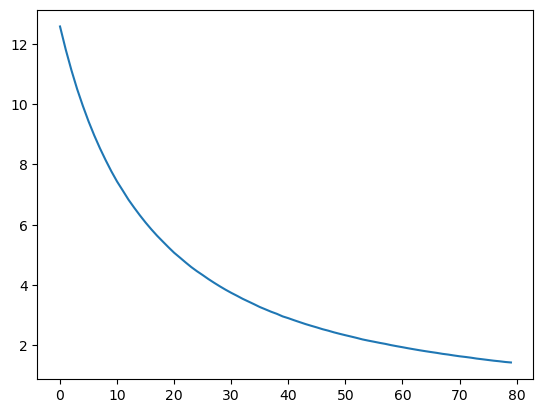

In [29]:
# training visualization
sns.lineplot(x = list(range(len(train_losses))), y = train_losses)

In [30]:
# model evaluation on test
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_test_pred_log = model(X_batch)
        y_test_pred = torch.argmax(y_test_pred_log,
                                   dim = 1)
        
y_test_pred_np = y_test_pred.squeeze().cpu().numpy()

acc = accuracy_score(y_pred = y_test_pred_np, y_true = y_test)
print(f'the accuracy of the model is {np.round(acc,3)*100} %')

the accuracy of the model is 62.9 %


In [32]:
most_common_cnt = Counter(y_test).most_common()[0][1]

print(f'Naive Classifier: {np.round(most_common_cnt/len(y_test) *100,1)}%')

Naive Classifier: 41.0%


<AxesSubplot:>

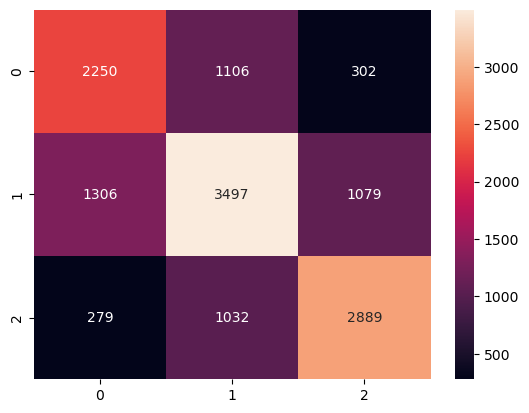

In [33]:
sns.heatmap(confusion_matrix(y_test_pred_np, y_test), annot =True, fmt = ".0f")